## 1. Tipos de fronteras en Clasificación
Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.

Éste dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:

In [349]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from ipywidgets import interactive
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM

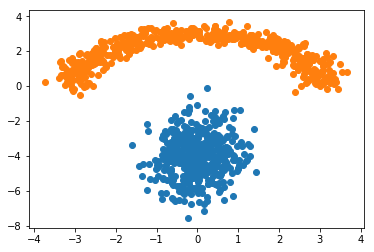

In [321]:
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)
plt.scatter(datos1[:,0], datos1[:,1])
plt.scatter(datos2[:,0], datos2[:,1])
plt.show()

(a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada conjunto y visualícelos.

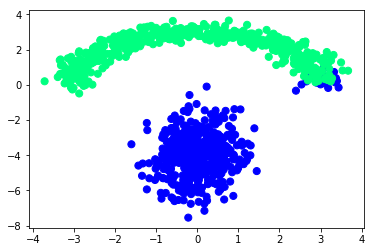

In [322]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.show()

Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:

In [323]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.

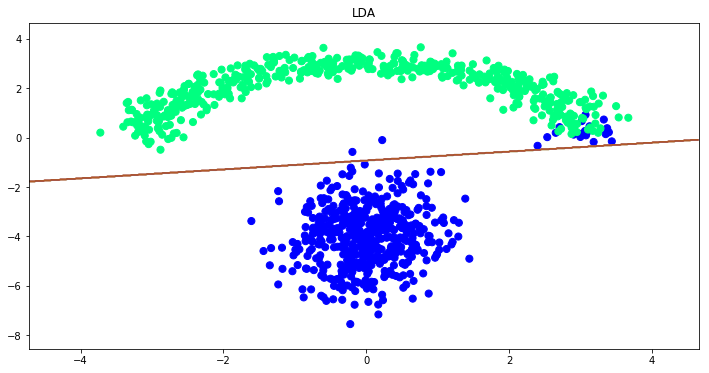

In [324]:
model = LDA()
model.fit(X,y)
yhat_LDA = model.predict(X)
visualize_border(model,X,y,"LDA")

## Respuesta
Se observa que no se logra separar correctamente los dos conjuntos de datos, quedante una pequeña porcion de los datos azules sobre el hyperplano.

(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?


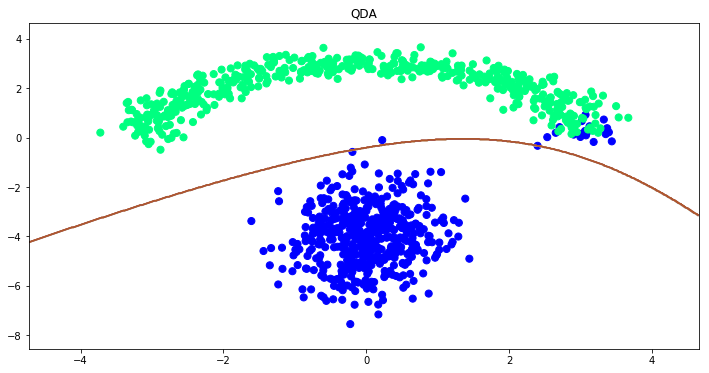

In [325]:
model = QDA()
model.fit(X,y)
yhat_QDA = model.predict(X)
visualize_border(model,X,y,"QDA")

## Respuesta
La diferencia mas notable es que QDA puede formar hyperplanos divisores cuadraticos, lo cual permite que tenga "curvatura" permitiendo cambiar la division de los datos.
Lamentablemente, de nuevo no se logro separar por completos ambos conjuntos, de echo, uno puede notar que practicamente se logro un resultado parecido al ejercicio anterior.

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.

In [326]:
y_pred_QDA = yhat_QDA
y_pred_LDA = yhat_LDA
y_true = y
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_QDA)))
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_LDA)))

Miss Classification Loss QDA: 0.021000
Miss Classification Loss LDA: 0.022000


## Respuesta
Como se puede ver, QDA tiene un mejor desempeño que LDA, esto ocurre por que QDA se adapta mejor al espacio intermedio con forma ovalada, clasificamendo mejor ciertos puntos que quedan fuera si trazamos una linea recta divisora.

Para lo que sigue de la actividad se trabajará con una widget interactiva [2] para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.


In [327]:
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)


(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

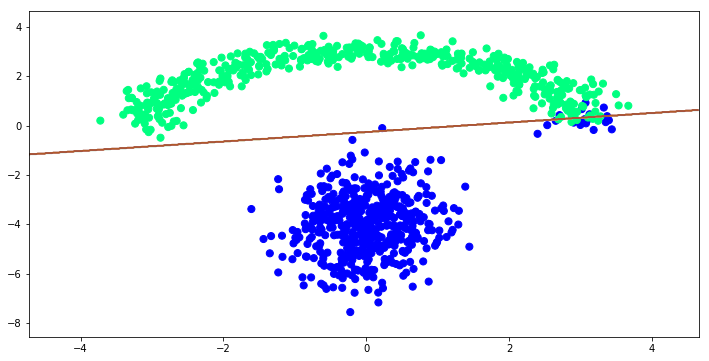

In [348]:
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0
p_max = 40
interactive(visualize_border_interactive,param=(p_min,p_max))

# Recordatorio: Discutir este item, es raro que cambie tan poco

(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [351]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y) 
    return model